# Parzen Window

The original manuscript from Emanuel Parzen implements it as:

$$
w[n] = \begin{cases}
  1 - 6n^2 + 6|n|^3 & |n| < \frac{1}{2}          \\
  2 (1 - |n|)^3     & \frac{1}{2} \le |n| \le 1  \\
  0                 & \text{otherwise}
\end{cases}
$$

which can be translated into terms of N and M (Recording blogs) as:

$$
w[n] = \begin{cases}
 1 - 6\big(\frac{|k−M|}{N - \mathrm{1}_{symmetric}}\big)^2 + 6\big(\frac{|k−M|}{N - \mathrm{1}_{symmetric}}\big)^3 & |k-M| \le M \\
 2\big(1−\frac{|k−M|}{N - \mathrm{1}_{symmetric}}\big)^3                                  & |k−M| > M
\end{cases}
$$

$M = \frac{N - \mathrm{1}_{symmetric}}{2}$

Wolfram alpha implements it (somewhat differently) as:

$$
w[n] = \begin{cases}
 2 (2n + 1)^3      & -\frac{1}{2} \le n <   -\frac{1}{4} \\
 1 - 24n^2 - 48n^3 & -\frac{1}{4} \le n <   0            \\
 1 - 24n^2 + 48n^3 & 0            \le n \le \frac{1}{4}  \\
-2 (2n - 1)^3      & \frac{1}{4}   < n  \le \frac{1}{2}  \\
 0                 & \text{otherwise}
\end{cases}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as dsp
import scipy.fftpack as fft
import IPython.display as display
from zplot import zplot
from compare import compare

In [2]:
def parzen(N, sym=True):
    """
    Return a Parzen window.

    Args:
        N: Number of points in the output window. 
        If zero or less, an empty array is returned.
        sym: When True (default), generates a symmetric window, 
        for use in filter design. When False, generates a 
        periodic window, for use in spectral analysis.

    Returns:
        the Parzen window of length N with given symmetry

    """
    n = np.arange(N, dtype=float)
    w = np.zeros(N, dtype=float)
    n = 2 * n / (N-sym) - 1  # [0, N) -> [-1, 1]
    w[abs(n) < 1/2 ] = 1 - 6 * n[abs(n) < 1/2]**2 + 6 * abs(n[abs(n) < 1/2])**3
    w[abs(n) >= 1/2] = 2 * (1 - abs(n[abs(n) >= 1/2]))**3
    return w

In [3]:
# def parzen(N, sym=True):
#     """
#     Return a Parzen window.
#
#     Args:
#         N: Number of points in the output window. 
#         If zero or less, an empty array is returned.
#         sym: When True (default), generates a symmetric window, 
#         for use in filter design. When False, generates a 
#         periodic window, for use in spectral analysis.
#
#     Returns:
#         the Parzen window of length N with given symmetry
#
#     """
#     n = np.arange(N, dtype=float)
#     w = np.zeros(N, dtype=float)
#     N = N - sym
#     M = N / 2
#     mask = abs(n - M) < M/2
#     w[mask]  = 1 - 6 * ((n[mask] - M)/M)**2 + 6 * abs((n[mask] - M)/M)**3
#     w[~mask] = 2 * (1 - abs((n[~mask] - M)/M))**3
#     return w

## Asymmetric

### Odd

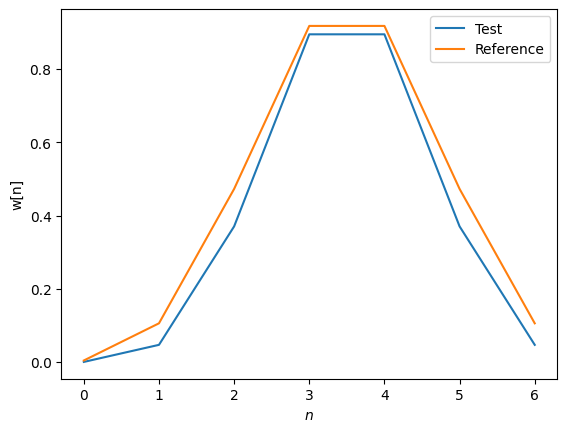

In [4]:
test, reference = compare(7, parzen, dsp.parzen, False)

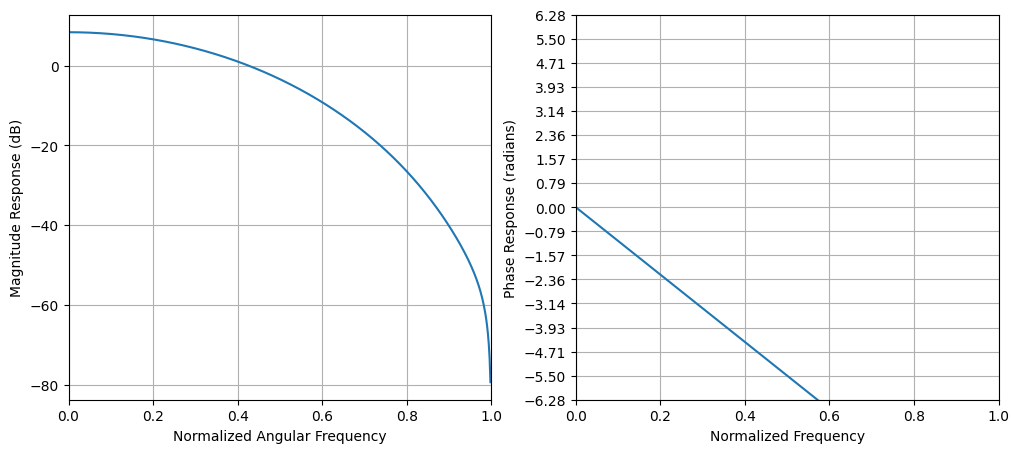

In [5]:
_ = dsp.freqz(test, plot=zplot)

In [6]:
list(test)

[0.0,
 0.0466472303206997,
 0.3702623906705537,
 0.8950437317784256,
 0.8950437317784257,
 0.3702623906705537,
 0.046647230320699756]

In [7]:
list(reference)

[0.00390625,
 0.10546875,
 0.47265625,
 0.91796875,
 0.91796875,
 0.47265625,
 0.10546875]

### Even

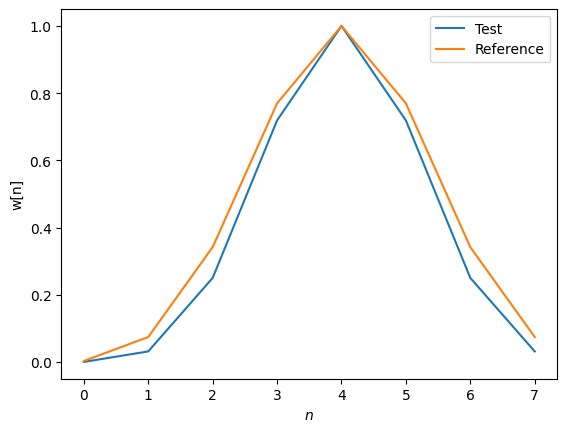

In [8]:
test, reference = compare(8, parzen, dsp.parzen, False)

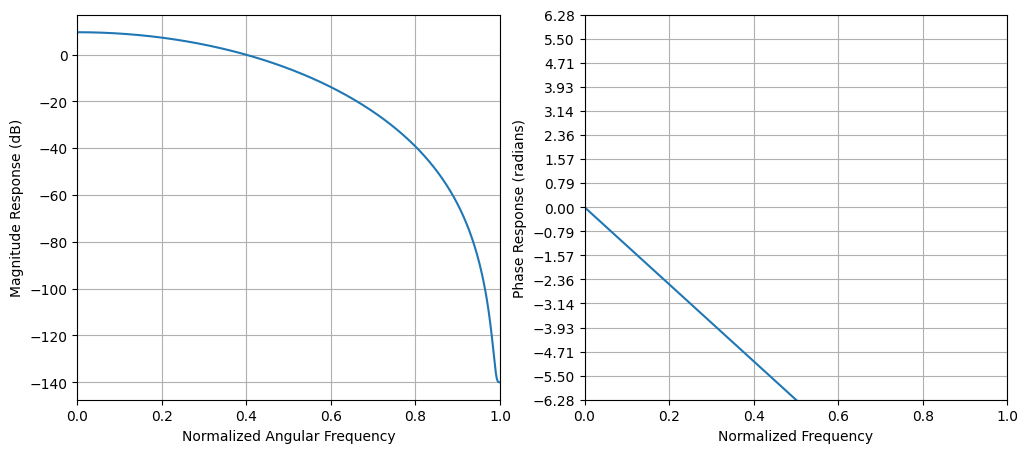

In [9]:
_ = dsp.freqz(test, plot=zplot)

In [10]:
list(test)

[0.0, 0.03125, 0.25, 0.71875, 1.0, 0.71875, 0.25, 0.03125]

In [11]:
list(reference)

[0.00274348422496571,
 0.0740740740740741,
 0.34156378600823034,
 0.7695473251028806,
 1.0,
 0.7695473251028806,
 0.34156378600823034,
 0.0740740740740741]

## Symmetric

### Odd

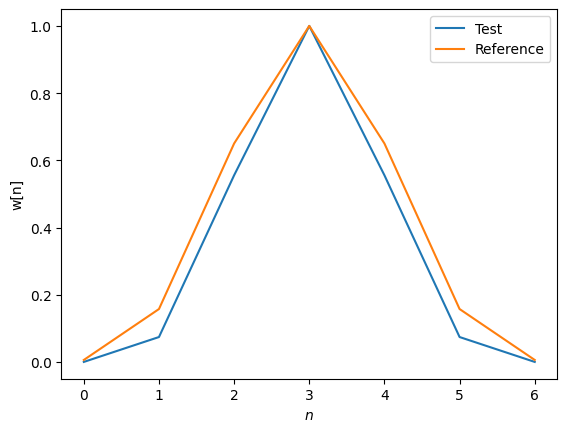

In [12]:
test, reference = compare(7, parzen, dsp.parzen, True)

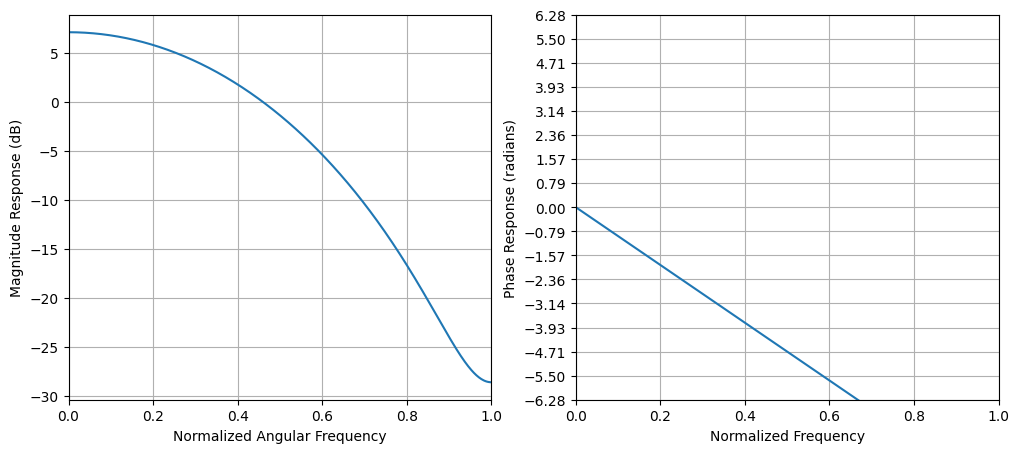

In [13]:
_ = dsp.freqz(test, plot=zplot)

In [14]:
list(test)

[0.0,
 0.07407407407407403,
 0.5555555555555556,
 1.0,
 0.5555555555555557,
 0.07407407407407403,
 0.0]

In [15]:
list(reference)

[0.0058309037900874695,
 0.15743440233236156,
 0.6501457725947521,
 1.0,
 0.6501457725947521,
 0.15743440233236156,
 0.0058309037900874695]

### Even

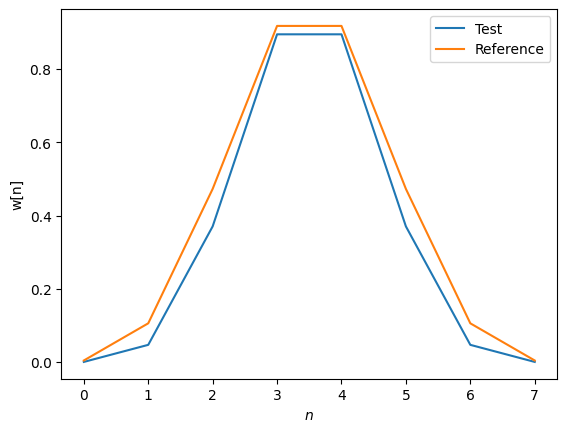

In [16]:
test, reference = compare(8, parzen, dsp.parzen, True)

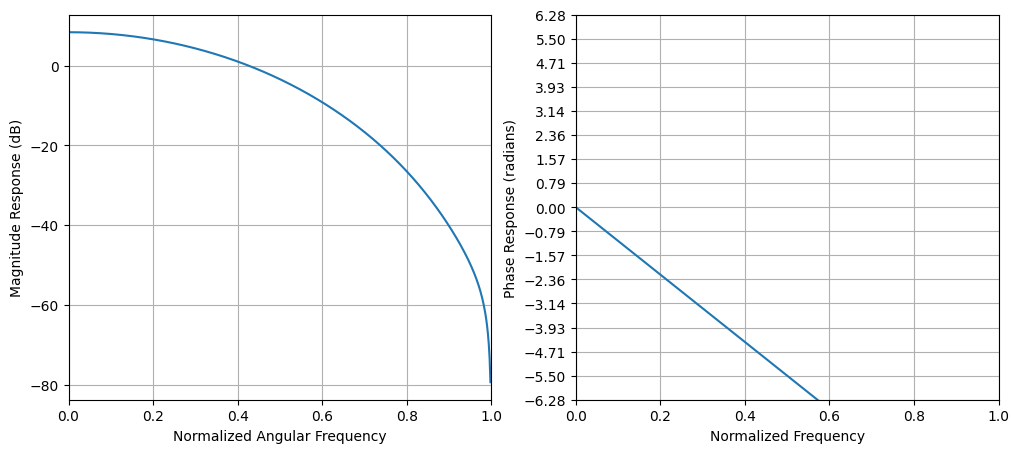

In [17]:
_ = dsp.freqz(test, plot=zplot)

In [18]:
list(test)

[0.0,
 0.0466472303206997,
 0.3702623906705537,
 0.8950437317784256,
 0.8950437317784257,
 0.3702623906705537,
 0.046647230320699756,
 0.0]

In [19]:
list(reference)

[0.00390625,
 0.10546875,
 0.47265625,
 0.91796875,
 0.91796875,
 0.47265625,
 0.10546875,
 0.00390625]

## Coherent gain

In [20]:
parzen(1024, False).mean()

0.375

## Side-lobe amplitude

-53.05964834835723

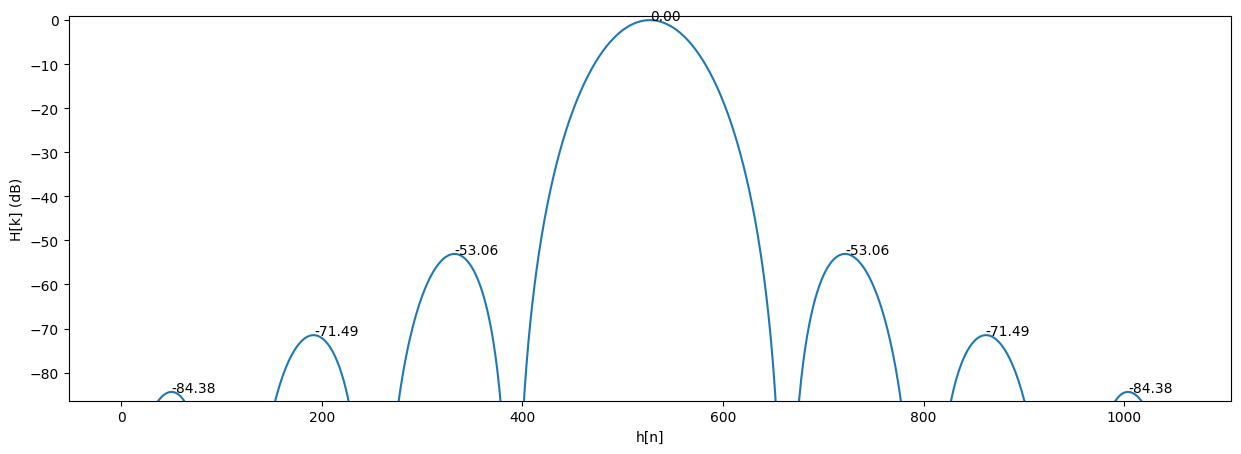

In [21]:
w = parzen(31, False)
w = np.pad(w, (512, 512))
H = fft.fft(w)
H = fft.fftshift(H)
H = 20 * np.log10(np.abs(H) + 1e-12)
H = H - H.max()
peaks, _ = dsp.find_peaks(H)
ymin = H[peaks[len(peaks)//2:]][-1] - 1
plt.figure(figsize=(15, 5))
plt.plot(H)
for x, y in zip(peaks, H[peaks]):
    if y > ymin:
        plt.text(x, y, f'{y:.2f}')
plt.ylabel('H[k] (dB)')
plt.xlabel('h[n]')
plt.ylim(ymin - 1, 1)
sorted(H[peaks], reverse=True)[1]